# 3.5.1 Basic Genetic Algorithm

## Introduction

Genetic Algorithms (GAs) are a class of optimization algorithms inspired by the process of natural selection. They are used to solve both constrained and unconstrained optimization problems by simulating the process of natural evolution. GAs are particularly useful for solving problems where the search space is large, complex, or poorly understood, making traditional optimization techniques less effective.

The basic principles of Genetic Algorithms include:

1. **Initialization**: A population of potential solutions is generated randomly. Each solution, called an individual or chromosome, is represented as a string of values (genes).

2. **Selection**: Individuals are evaluated based on a fitness function, which measures how well they solve the problem. The fittest individuals are selected to pass their genes to the next generation.

3. **Crossover**: Selected individuals pair up and exchange parts of their genes to produce offspring. This process, inspired by biological reproduction, allows the algorithm to explore new solutions.

4. **Mutation**: Random changes are introduced to some genes of the offspring. Mutation helps maintain genetic diversity within the population and prevents premature convergence to suboptimal solutions.

5. **Replacement**: The new generation of individuals replaces the old one, and the process repeats until a termination condition is met (e.g., a maximum number of generations or a satisfactory fitness level).

## Readings:
- [Genetic Algorithm in Machine Learning](https://www.javatpoint.com/genetic-algorithm-in-machine-learning)
- [Introduction to Genetic Algorithms](https://readmedium.com/en/https:/towardsdatascience.com/introduction-to-genetic-algorithms-including-example-code-e396e98d8bf3)

In this section, we will explore the basic principles of Genetic Algorithms and demonstrate how to implement them to solve optimization problems. The process involves initializing a population of solutions, selecting the best solutions, combining them to create new solutions, and introducing random mutations to maintain diversity in the population.

We will apply a Genetic Algorithm to minimize a well-known optimization benchmark, the Rastrigin function. This function is often used to test the performance of optimization algorithms due to its large search space and many local minima.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Objective function to minimize (Rastrigin function)
def objective_function(x):
    return 10 * len(x) + sum(xi**2 - 10 * np.cos(2 * np.pi * xi) for xi in x)

In [3]:
# Initialize population
def initialize_population(size, num_genes):
    return np.random.uniform(low=-5.12, high=5.12, size=(size, num_genes))

In [4]:
# Selection process
def select_parents(pop, fitness, num_parents):
    parents = np.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999
    return parents

In [5]:
# Crossover process
def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    crossover_point = np.uint8(offspring_size[1]/2)
    for k in range(offspring_size[0]):
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k+1) % parents.shape[0]
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

In [6]:
# Mutation process
def mutate(offspring_crossover, mutation_rate):
    for idx in range(offspring_crossover.shape[0]):
        for gene_idx in range(offspring_crossover.shape[1]):
            if np.random.rand() < mutation_rate:
                random_value = np.random.uniform(-1.0, 1.0, 1)[0]
                offspring_crossover[idx, gene_idx] += random_value
    return offspring_crossover

In [7]:
# Genetic Algorithm parameters
population_size = 50
num_generations = 100
num_parents_mating = 10
mutation_rate = 0.1
num_genes = 2

In [8]:
# Genetic Algorithm
population = initialize_population(population_size, num_genes)
print(population[:5,:])

[[-1.69077172  0.40576563]
 [ 4.49493669  2.09728168]
 [-0.9640999   2.39056154]
 [ 1.04921824 -4.04341159]
 [-3.84738746 -4.20441433]]


In [9]:
best_outputs = []
for generation in range(num_generations):
    fitness = np.array([objective_function(ind) for ind in population])
    best_outputs.append(np.min(fitness))
    parents = select_parents(population, fitness, num_parents_mating)
    offspring_crossover = crossover(parents, (population_size - parents.shape[0], num_genes))
    offspring_mutation = mutate(offspring_crossover, mutation_rate)
    population[0:parents.shape[0], :] = parents
    population[parents.shape[0]:, :] = offspring_mutation

In [10]:
# Best solution
fitness = np.array([objective_function(ind) for ind in population])
best_match_idx = np.where(fitness == np.min(fitness))
best_solution = population[best_match_idx, :][0][0]
best_solution_fitness = fitness[best_match_idx][0]

print(f"Best solution: {best_solution}")
print(f"Best solution fitness: {best_solution_fitness}")

Best solution: [-35.95268296 -30.3382626 ]
Best solution fitness: 2228.710066479819


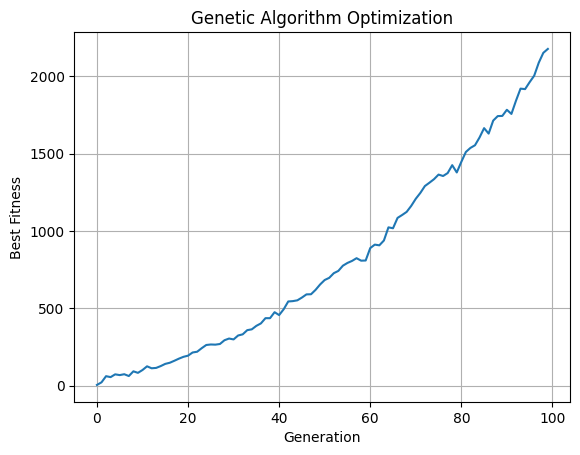

In [11]:
# Visualization
plt.plot(best_outputs)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Genetic Algorithm Optimization")
plt.grid(True)
plt.show()

## Conclusion

Genetic Algorithms (GAs) are powerful optimization techniques inspired by the principles of natural evolution. They provide robust solutions to complex optimization problems by mimicking the processes of selection, crossover, and mutation. 

In this example, we demonstrated the implementation of a basic Genetic Algorithm to minimize the Rastrigin function, a common benchmark problem in optimization. The algorithm successfully evolved the population over generations, converging towards the optimal solution.

GAs are widely applicable in various fields, including engineering, economics, and artificial intelligence, where they are used to solve problems that are difficult or impossible to solve using traditional optimization methods. Their ability to explore large search spaces and handle non-linear, multi-modal functions makes them a valuable tool in the optimization toolkit.
